C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


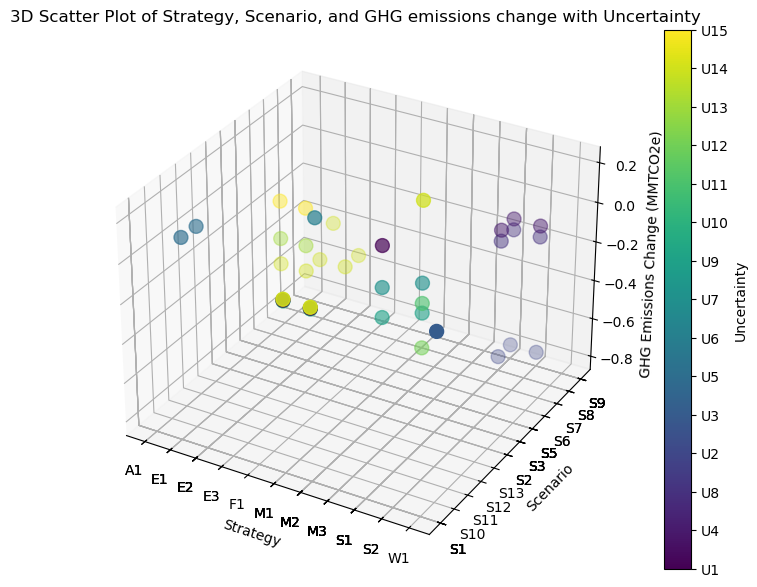

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the data into a DataFrame
data = {
    "Strategy": ["M1", "M1", "M1", "M2", "M2", "M2", "M2", "M2", "M2", "M3", "M3", "M3", "M3", "M3", "E1", "E1", 
                 "E1", "E2", "E2", "E2", "E2", "E2", "E3", "E3", "S1", "S1", "S1", "S1", "S1", "S1", "S2", "S2","S2", 
                 "W1", "A1", "A1", "F1"],
    "Scenario": ["S1", "S1", "S1", "S1", "S1", "S1", "S2", "S2", "S2", "S3", "S3", "S3", "S3", "S3", "S5", "S5", 
                 "S5", "S5", "S5", "S5", "S6", "S7", "S6", "S7", "S8", "S8", "S8", "S9", "S9", "S9", "S9", "S9", "S9",
                 "S10", "S11", "S12", "S13"],
    "Uncertainty": ["U1", "U4", "U8", "U1", "U4", "U8", "U1", "U2", "U3", "U2", "U3", "U5", "U6", "U8", "U7", "U8", 
                    "U9", "U7", "U8", "U9", "U8", "U8", "U8", "U8", "U10", "U11", "U12", "U10", "U11", "U12", "U10", 
                    "U11", "U12", "U13", "U14", "U14", "U15"],
    "Change in uncertainty": [-0.1, -0.3, 0.1, -0.1, -0.3, 0.1, 0.2, -0.2, -0.2, -0.2, -0.2, -0.3, -0.3, 0.2, -0.2, 
                             -0.3, -0.1, -0.2, -0.3, -0.1, -0.3, -0.2, -0.3, -0.3, -0.1, -0.2, -0.3, -0.1, -0.2, -0.3, 
                             -0.1, -0.2, -0.3, -0.2, -0.1, -0.2, -0.2],
    "GHG Reduction (MMTCO2e)": [-0.002023, -0.006070271, 0.002023424, -0.002023, -0.006070271, 0.002023, 0.004046848, 
                               -0.20577986, -0.357922522, -0.20577986, -0.357922522, -0.308669791, -0.536883782, 
                               0.20577986, -0.262988077, -0.394482116, -0.07028926, -0.262988077, -0.394482116, 
                               -0.07028926, -0.394482116, -0.262988077, -0.394482116, -0.394482116, -0.136, -0.192, 
                               -0.7978206, -0.136, -0.192, -0.7978206, -0.136, -0.192, -0.7978206, -0.018571429, 
                               -0.002924109, -0.005848217, 0.125578246]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Forward fill missing values if needed
df["Strategy"] = df["Strategy"].ffill()
df["Scenario"] = df["Scenario"].ffill()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Map categorical columns to numbers
df["Strategy_num"] = pd.Categorical(df["Strategy"]).codes
df["Scenario_num"] = pd.Categorical(df["Scenario"]).codes

# Create scatter plot
sc = ax.scatter(df["Strategy_num"], df["Scenario_num"], df["GHG Reduction (MMTCO2e)"], 
                c=pd.Categorical(df["Uncertainty"]).codes, cmap='viridis', s=100)

# Add axis labels
ax.set_xlabel('Strategy')
ax.set_ylabel('Scenario')
ax.set_zlabel('GHG Emissions Change (MMTCO2e)')

# Create ticks for the x and y axes
ax.set_xticks(df["Strategy_num"])
ax.set_xticklabels(df["Strategy"])
ax.set_yticks(df["Scenario_num"])
ax.set_yticklabels(df["Scenario"])

# Add color bar legend for uncertainty
cbar = plt.colorbar(sc, ax=ax)
cbar.set_ticks(range(len(df["Uncertainty"].unique())))
cbar.set_ticklabels(df["Uncertainty"].unique())
cbar.set_label('Uncertainty')

# Show the plot
plt.title('3D Scatter Plot of Strategy, Scenario, and GHG emissions change with Uncertainty')
plt.show()


In [2]:
# Check the lengths of each list in the dictionary
for key, value in data.items():
    print(f"Length of '{key}': {len(value)}")


Length of 'Strategy': 37
Length of 'Scenario': 37
Length of 'Uncertainty': 37
Length of 'Change in uncertainty': 37
Length of 'GHG Reduction (MMTCO2e)': 37


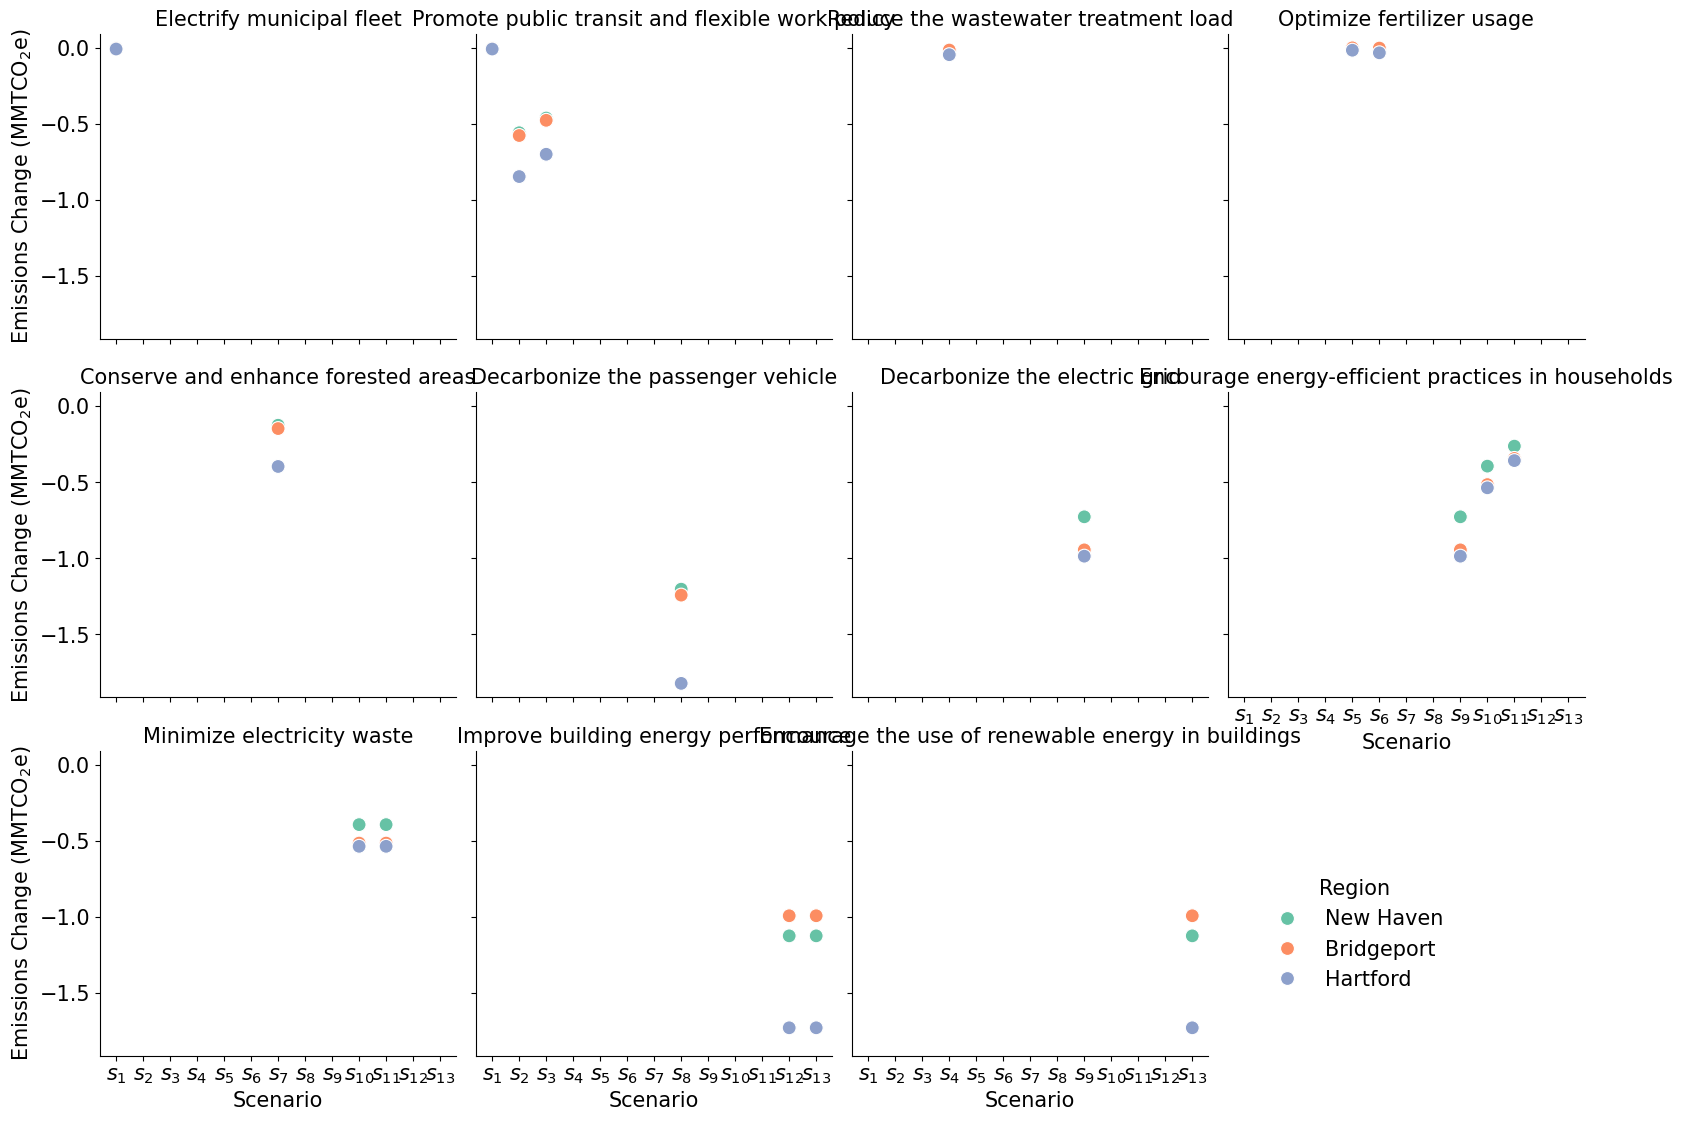

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame from the provided data
data = {
    "Strategy": ["M1", "M2", "M2", "M2", "M3", "E1", "E2", "E2", "E2", "E3", "E3", "S1", "S1", "S2", "W1", "A1", "A1", "F1"],
    "Scenario": ["S1", "S1", "S2", "S4", "S3", "S5", "S5", "S6", "S7", "S6", "S7", "S8", "S9", "S9", "S10", "S11", "S12", "S13"],
    "New Haven": [-0.006070271, -0.006070271, -0.559655534, -0.462835876, -1.203476095, -0.727759452, 
                  -0.727759452, -0.394482116, -0.262988077, -0.394482116, -0.394482116, -1.1258206, 
                  -1.1258206, -1.1258206, -0.018571429, -0.002924109, -0.005848217, -0.125578246],
    "Bridgeport": [-0.006267786, -0.006267786, -0.577865654, -0.477895669, -1.242634904, -0.945171364, 
                   -0.945171364, -0.515894166, -0.343929444, -0.515894166, -0.515894166, -0.993646979, 
                   -0.993646979, -0.993646979, -0.015800514, -0.001440705, -0.002881411, -0.147446347],
    "Hartford": [-0.009194623, -0.009194623, -0.8477087, -0.701056229, -1.822901933, -0.986564255, 
                 -0.986564255, -0.537065672, -0.358043781, -0.537065672, -0.537065672, -1.730320846, 
                 -1.730320846, -1.730320846, -0.046469401, -0.017043522, -0.034087043, -0.396749413]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Mapping for strategy labels
strategy_labels = {
    "M1": "Electrify municipal fleet",
    "M2": "Promote public transit and flexible work policy",
    "M3": "Decarbonize the passenger vehicle",
    "E1": "Decarbonize the electric grid",
    "E2": "Encourage energy-efficient practices in households",
    "E3": "Minimize electricity waste",
    "S1": "Improve building energy performance",
    "S2": "Encourage the use of renewable energy in buildings",
    "W1": "Reduce the wastewater treatment load",
    "A1": "Optimize fertilizer usage",
    "F1": "Conserve and enhance forested areas"
}

# Replace strategy codes with their corresponding labels
df['Strategy'] = df['Strategy'].map(strategy_labels)

# Create a complete DataFrame with all scenarios
all_scenarios = pd.DataFrame({"Scenario": ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13"]})
complete_df = all_scenarios.merge(df, on="Scenario", how="outer")

# Convert data to a long format for plotting with hue distinction
df_long = complete_df.melt(id_vars=["Strategy", "Scenario"], 
                            value_vars=["New Haven", "Bridgeport", "Hartford"],
                            var_name="Region", value_name="Reduction")

# Create a FacetGrid to plot each strategy in a separate facet
g = sns.FacetGrid(df_long, col="Strategy", col_wrap=4, sharex=True, sharey=True, height=4)

# Map scatterplot to each facet, using "City" for hue
g.map_dataframe(sns.scatterplot, x="Scenario", y="Reduction", hue="Region", palette="Set2", s=100)

# Adjust labels and titles
g.set_axis_labels("Scenario", "Emissions Change (MMTCO$_2$e)",fontsize=15)
g.set_titles(col_template="{col_name}", size=15)
g.set_xticklabels(rotation=0)

# Set the font size for x and y axis ticks
for ax in g.axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=15)

# Set all scenarios on the x-axis with subscripts, ensuring proper formatting
subscripted_scenarios = [f"$s_{{{i}}}$" for i in range(1, len(all_scenarios['Scenario']) + 1)]

for ax in g.axes.flat:
    ax.set_xticks(range(len(all_scenarios['Scenario'])))  # Set x-ticks to number of all scenarios
    ax.set_xticklabels(subscripted_scenarios, rotation=0)  # Set x-tick labels to all scenarios with subscripts

plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title

# Add a legend outside of the grid
g.add_legend(title="Region", bbox_to_anchor=(0.7, 0.15), loc="center left", borderaxespad=0,fontsize=15)

# Set the font size of the legend title
for text in g._legend.texts:  # Access the legend text objects
    text.set_fontsize(15)  # Set the font size for legend labels

# Set the font size for the legend title
g._legend.get_title().set_fontsize(15)  # Adjust the legend title font size


# Show the plot
plt.show()


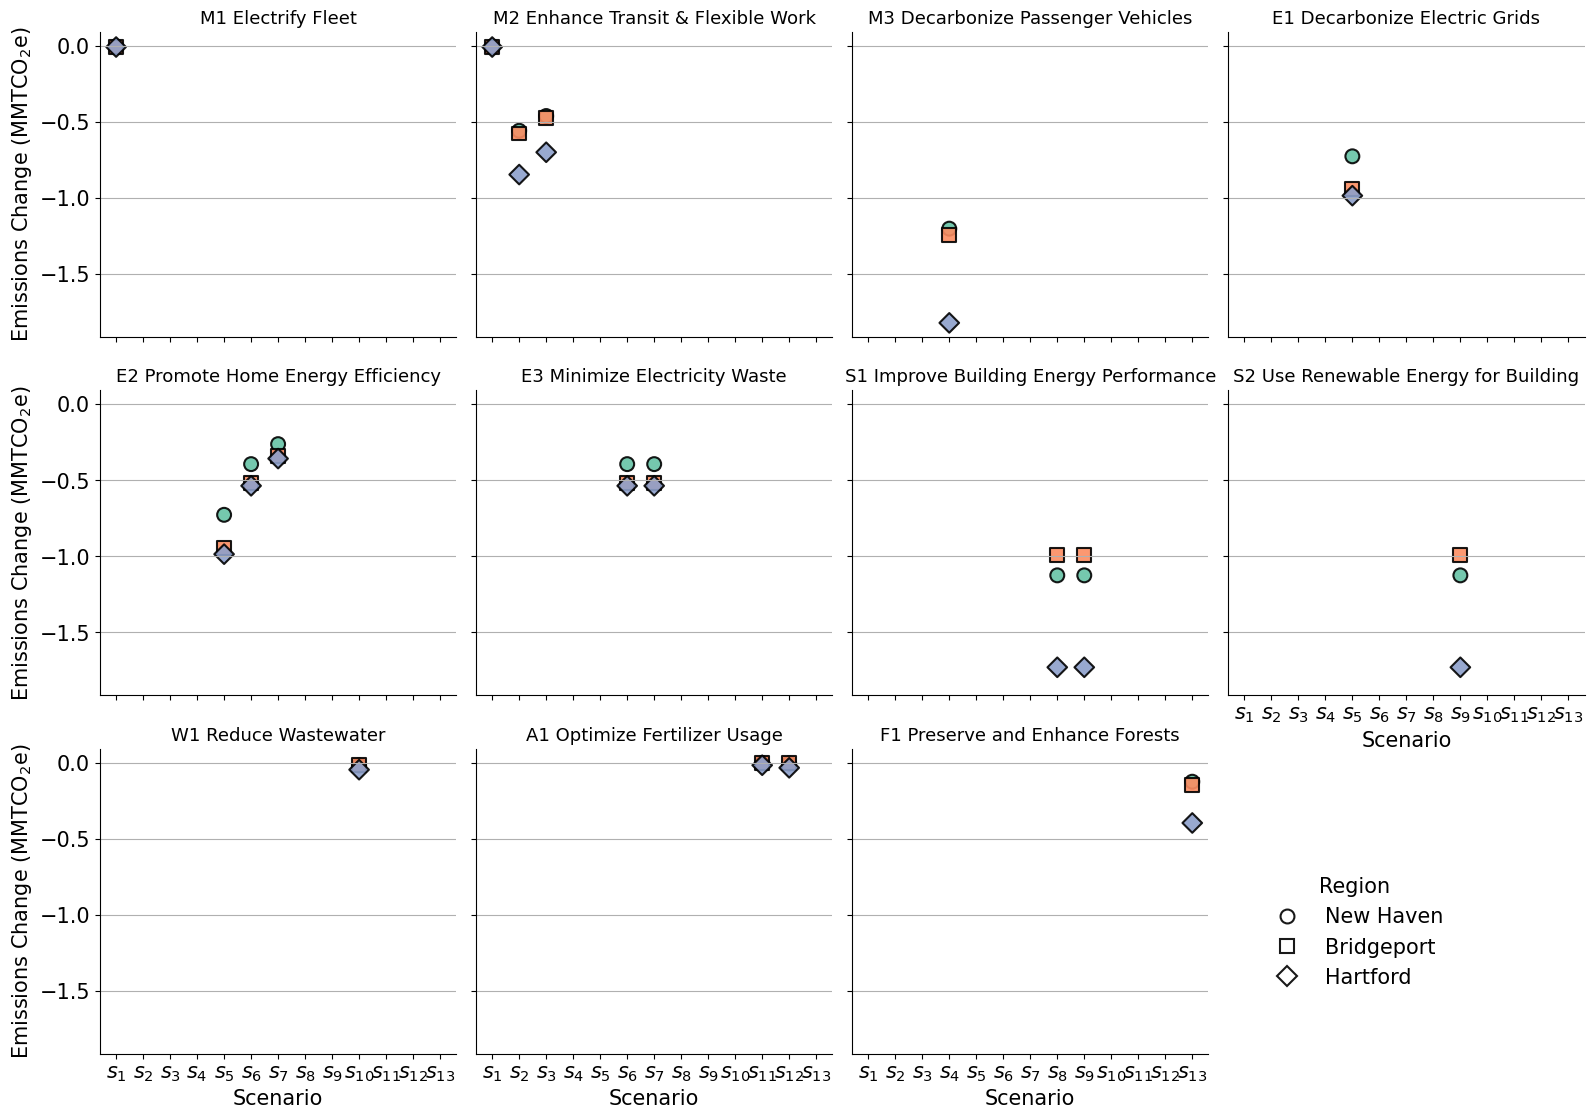

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame from the provided data
data = {
    "Strategy": ["M1", "M2", "M2", "M2", "M3", "E1", "E2", "E2", "E2", "E3", "E3", "S1", "S1", "S2", "W1", "A1", "A1", "F1"],
    "Scenario": ["S1", "S1", "S2", "S4", "S3", "S5", "S5", "S6", "S7", "S6", "S7", "S8", "S9", "S9", "S10", "S11", "S12", "S13"],
    "New Haven": [-0.006070271, -0.006070271, -0.559655534, -0.462835876, -1.203476095, -0.727759452, 
                  -0.727759452, -0.394482116, -0.262988077, -0.394482116, -0.394482116, -1.1258206, 
                  -1.1258206, -1.1258206, -0.018571429, -0.002924109, -0.005848217, -0.125578246],
    "Bridgeport": [-0.006267786, -0.006267786, -0.577865654, -0.477895669, -1.242634904, -0.945171364, 
                   -0.945171364, -0.515894166, -0.343929444, -0.515894166, -0.515894166, -0.993646979, 
                   -0.993646979, -0.993646979, -0.015800514, -0.001440705, -0.002881411, -0.147446347],
    "Hartford": [-0.009194623, -0.009194623, -0.8477087, -0.701056229, -1.822901933, -0.986564255, 
                 -0.986564255, -0.537065672, -0.358043781, -0.537065672, -0.537065672, -1.730320846, 
                 -1.730320846, -1.730320846, -0.046469401, -0.017043522, -0.034087043, -0.396749413]
}
# Convert data to a DataFrame
df = pd.DataFrame(data)

# Mapping for strategy labels
strategy_labels = {
    "M1": "M1 Electrify Fleet",
    "M2": "M2 Enhance Transit & Flexible Work",
    "M3": "M3 Decarbonize Passenger Vehicles",
    "E1": "E1 Decarbonize Electric Grids",
    "E2": "E2 Promote Home Energy Efficiency",
    "E3": "E3 Minimize Electricity Waste",
    "S1": "S1 Improve Building Energy Performance",
    "S2": "S2 Use Renewable Energy for Building",
    "W1": "W1 Reduce Wastewater",
    "A1": "A1 Optimize Fertilizer Usage",
    "F1": "F1 Preserve and Enhance Forests"
}

# Replace strategy codes with their corresponding labels
df['Strategy'] = df['Strategy'].map(strategy_labels)

# Create a complete DataFrame with all scenarios
all_scenarios = pd.DataFrame({"Scenario": ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13"]})
complete_df = all_scenarios.merge(df, on="Scenario", how="outer")

# Convert data to a long format for plotting
df_long = complete_df.melt(id_vars=["Strategy", "Scenario"], 
                            value_vars=["New Haven", "Bridgeport", "Hartford"],
                            var_name="Region", value_name="Reduction")

# Check if df_long is empty
if df_long.empty:
    print("Warning: df_long is empty. No data to plot.")
else:
    # Define the order of strategies based on their prefix
    strategy_order = list(df['Strategy'].unique())

    # Create a FacetGrid to plot each strategy in a separate facet
    g = sns.FacetGrid(df_long, col="Strategy", col_order=strategy_order, col_wrap=4, sharex=True, sharey=True, height=4)

    # Map scatterplot to each facet with unique markers for each region
    markers = {"New Haven": "o", "Bridgeport": "s", "Hartford": "D"}
    g.map_dataframe(
    sns.scatterplot, 
    x="Scenario", y="Reduction", 
    style="Region", hue="Region", palette="Set2",
    markers=markers, s=100, 
    edgecolor="black", facecolors="none",alpha=0.9,linewidth=1.5
)

    # Adjust labels and titles
    g.set_axis_labels("Scenario", "Emissions Change (MMTCO$_2$e)", fontsize=15)
    g.set_titles(col_template="{col_name}", size=13)
    g.set_xticklabels(rotation=0)

    # Set the font size for x and y axis ticks
    for ax in g.axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.yaxis.grid(True)

    # Set all scenarios on the x-axis with subscripts
    subscripted_scenarios = [f"$s_{{{i}}}$" for i in range(1, len(all_scenarios['Scenario']) + 1)]
    
    for ax in g.axes.flat:
        ax.set_xticks(range(len(all_scenarios['Scenario'])))
        ax.set_xticklabels(subscripted_scenarios, rotation=0)

    plt.subplots_adjust(top=0.9)
    
    # Add a legend outside of the grid
    g.add_legend(title="Region", bbox_to_anchor=(0.7, 0.15), loc="center left", borderaxespad=0, fontsize=15)

    # Set the font size of the legend title
    for text in g._legend.texts:
        text.set_fontsize(15)

    # Set the font size for the legend title
    g._legend.get_title().set_fontsize(15)

    # Show the plot
    plt.savefig('../../figures/paper-images/emissions-reduction.jpg', dpi=800, bbox_inches='tight')


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Create the DataFrame from the provided data
data = {
    "Strategy": ["M1", "M2", "M2", "M2", "M3", "E1", "E2", "E2", "E2", "E3", "E3", "S1", "S1", "S2", "W1", "A1", "A1", "F1"],
    "Scenario": ["S1", "S1", "S2", "S4", "S3", "S5", "S5", "S6", "S7", "S6", "S7", "S8", "S9", "S9", "S10", "S11", "S12", "S13"],
    "New Haven": [-0.006070271, -0.006070271, -0.559655534, -0.462835876, -1.203476095, -0.727759452, 
                  -0.727759452, -0.394482116, -0.262988077, -0.394482116, -0.394482116, -1.1258206, 
                  -1.1258206, -1.1258206, -0.018571429, -0.002924109, -0.005848217, -0.125578246],
    "Bridgeport": [-0.006267786, -0.006267786, -0.577865654, -0.477895669, -1.242634904, -0.945171364, 
                   -0.945171364, -0.515894166, -0.343929444, -0.515894166, -0.515894166, -0.993646979, 
                   -0.993646979, -0.993646979, -0.015800514, -0.001440705, -0.002881411, -0.147446347],
    "Hartford": [-0.009194623, -0.009194623, -0.8477087, -0.701056229, -1.822901933, -0.986564255, 
                 -0.986564255, -0.537065672, -0.358043781, -0.537065672, -0.537065672, -1.730320846, 
                 -1.730320846, -1.730320846, -0.046469401, -0.017043522, -0.034087043, -0.396749413]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Mapping for strategy labels
strategy_labels = {
    "M1": "M1 Electrify Fleet",
    "M2": "M2 Enhance Transit & Flexible Work",
    "M3": "M3 Decarbonize Passenger Vehicles",
    "E1": "E1 Decarbonize Electric Grids",
    "E2": "E2 Promote Home Energy Efficiency",
    "E3": "E3 Minimize Electricity Waste",
    "S1": "S1 Improve Building Energy Performance",
    "S2": "S2 Use Renewable Energy for Building",
    "W1": "W1 Reduce Wastewater",
    "A1": "A1 Optimize Fertilizer Usage",
    "F1": "F1 Preserve and Enhance Forests"
}

# Replace strategy codes with their corresponding labels
df['Strategy'] = df['Strategy'].map(strategy_labels)

# Create a complete DataFrame with all scenarios
all_scenarios = pd.DataFrame({"Scenario": ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13"]})
complete_df = all_scenarios.merge(df, on="Scenario", how="outer")

# Convert data to a long format for plotting
df_long = complete_df.melt(id_vars=["Strategy", "Scenario"], 
                            value_vars=["New Haven", "Bridgeport", "Hartford"],
                            var_name="Region", value_name="Reduction")

# Check if df_long is empty
if df_long.empty:
    print("Warning: df_long is empty. No data to plot.")
else:
    # Define the order of strategies based on their prefix
    strategy_order = list(df['Strategy'].unique())

    # Create a FacetGrid to plot each strategy in a separate facet
    g = sns.FacetGrid(df_long, col="Strategy", col_order=strategy_order, col_wrap=4, sharex=True, sharey=True, height=4)

    # Map scatterplot to each facet with unique markers for each region
    markers = {"New Haven": "o", "Bridgeport": "s", "Hartford": "D"}
    g.map_dataframe(
        sns.scatterplot, 
        x="Scenario", y="Reduction", 
        style="Region", hue="Region", palette="Set2",
        markers=markers, s=100, 
        edgecolor="black", facecolors="none", alpha=0.9, linewidth=1.5
    )

    # Adjust labels and titles
    g.set_axis_labels("Scenario", "Emissions Change (MMTCO$_2$e)", fontsize=15)
    g.set_titles(col_template="{col_name}", size=13)
    g.set_xticklabels(rotation=0)

    # Set the font size for x and y axis ticks
    for ax in g.axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.yaxis.grid(True)

    # Set all scenarios on the x-axis with subscripts
    subscripted_scenarios = [f"$s_{{{i}}}$" for i in range(1, len(all_scenarios['Scenario']) + 1)]
    
    for ax in g.axes.flat:
        ax.set_xticks(range(len(all_scenarios['Scenario'])))
        ax.set_xticklabels(subscripted_scenarios, rotation=0)

    plt.subplots_adjust(top=0.9)
    
    # Create the custom legend manually in the desired order
    bridgeport_patch = mlines.Line2D([], [], color='green', marker='s', markersize=10,label='Bridgeport Area')  # Bridgeport first
    hartford_patch = mlines.Line2D([], [], color='tomato', marker='D', markersize=10,label='Hartford Area')      # Hartford second
    new_haven_patch = mlines.Line2D([], [], color='orange', marker='o', markersize=10, label='New Haven Area')   # New Haven last

    # Add the custom legend to the figure
    g.fig.legend(handles=[tomato_patch, deepskyblue_patch, green_patch], 
                  title="Region", bbox_to_anchor=(0.8, 0.15), loc="center left", 
                  borderaxespad=0, fontsize=15)

    # # Set the font size for the legend title
    # g.fig.get_legend().get_title().set_fontsize(15)
    


    # Show the plot
    plt.savefig('../../figures/paper-images/emissions-reduction.jpg', dpi=800, bbox_inches='tight') 
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.lines as mlines

# Create the DataFrame from the provided data
data = {
    "Strategy": ["M1", "M2", "M2", "M2", "M3", "E1", "E2", "E2", "E2", "E3", "E3", "S1", "S1", "S2", "W1", "A1", "A1", "F1"],
    "Scenario": ["S1", "S1", "S2", "S4", "S3", "S5", "S5", "S6", "S7", "S6", "S7", "S8", "S9", "S9", "S10", "S11", "S12", "S13"],
    "New Haven": [-0.006070271, -0.006070271, -0.559655534, -0.462835876, -1.203476095, -0.727759452, 
                  -0.727759452, -0.394482116, -0.262988077, -0.394482116, -0.394482116, -1.1258206, 
                  -1.1258206, -1.1258206, -0.018571429, -0.002924109, -0.005848217, -0.125578246],
    "Bridgeport": [-0.006267786, -0.006267786, -0.577865654, -0.477895669, -1.242634904, -0.945171364, 
                   -0.945171364, -0.515894166, -0.343929444, -0.515894166, -0.515894166, -0.993646979, 
                   -0.993646979, -0.993646979, -0.015800514, -0.001440705, -0.002881411, -0.147446347],
    "Hartford": [-0.009194623, -0.009194623, -0.8477087, -0.701056229, -1.822901933, -0.986564255, 
                 -0.986564255, -0.537065672, -0.358043781, -0.537065672, -0.537065672, -1.730320846, 
                 -1.730320846, -1.730320846, -0.046469401, -0.017043522, -0.034087043, -0.396749413]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Mapping for strategy labels
strategy_labels = {
    "M1": "M1 Electrify Fleet",
    "M2": "M2 Enhance Transit & Flexible Work",
    "M3": "M3 Decarbonize Passenger Vehicles",
    "E1": "E1 Decarbonize Electric Grids",
    "E2": "E2 Promote Home Energy Efficiency",
    "E3": "E3 Minimize Electricity Waste",
    "S1": "S1 Improve Building Energy Performance",
    "S2": "S2 Use Renewable Energy for Building",
    "W1": "W1 Reduce Wastewater",
    "A1": "A1 Optimize Fertilizer Usage",
    "F1": "F1 Preserve and Enhance Forests"
}

# Replace strategy codes with their corresponding labels
df['Strategy'] = df['Strategy'].map(strategy_labels)

# Create a complete DataFrame with all scenarios
all_scenarios = pd.DataFrame({"Scenario": ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13"]})
complete_df = all_scenarios.merge(df, on="Scenario", how="outer")

# Convert data to a long format for plotting
df_long = complete_df.melt(id_vars=["Strategy", "Scenario"], 
                            value_vars=["New Haven", "Bridgeport", "Hartford"],
                            var_name="Region", value_name="Reduction")

# Check if df_long is empty
if df_long.empty:
    print("Warning: df_long is empty. No data to plot.")
else:
    # Define the order of strategies based on their prefix
    strategy_order = list(df['Strategy'].unique())

    # Define a custom color palette
    custom_palette = {
        "New Haven": "orange",  # Color for New Haven
        "Bridgeport": "green",  # Color for Bridgeport
        "Hartford": "tomato"     # Color for Hartford
    }

    # Create a FacetGrid to plot each strategy in a separate facet
    g = sns.FacetGrid(df_long, col="Strategy", col_order=strategy_order, col_wrap=3, sharex=True, sharey=True, height=4)

    # Map scatterplot to each facet with unique markers for each region
    markers = {"New Haven": "o", "Bridgeport": "s", "Hartford": "D"}
    g.map_dataframe(
        sns.scatterplot, 
        x="Scenario", y="Reduction", 
        style="Region", hue="Region", palette=custom_palette,
        markers=markers, s=100, 
        edgecolor="black", facecolors="none", alpha=0.9, linewidth=1.5
    )

    # Adjust labels and titles
    g.set_axis_labels("Scenario", "Emissions Change (MMTCO$_2$e)", fontsize=15)
    g.set_titles(col_template="{col_name}", size=13)
    g.set_xticklabels(rotation=0)

    # Set the font size for x and y axis ticks
    for ax in g.axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.yaxis.grid(True)

    # Set all scenarios on the x-axis with subscripts
    subscripted_scenarios = [f"$s_{{{i}}}$" for i in range(1, len(all_scenarios['Scenario']) + 1)]
    
    for ax in g.axes.flat:
        ax.set_xticks(range(len(all_scenarios['Scenario'])))
        ax.set_xticklabels(subscripted_scenarios, rotation=0)

    plt.subplots_adjust(top=0.9)
    
        # Create the custom legend manually in the desired order
    bridgeport_patch = mlines.Line2D([], [], color='green', marker='s', markersize=10,label='Bridgeport Area')  # Bridgeport first
    hartford_patch = mlines.Line2D([], [], color='tomato', marker='D', markersize=10,label='Hartford Area')      # Hartford second
    new_haven_patch = mlines.Line2D([], [], color='orange', marker='o', markersize=10, label='New Haven Area')   # New Haven last
    


    # Add the custom legend to the figure with the specified order
    legend = g.fig.legend(handles=[bridgeport_patch, hartford_patch, new_haven_patch], 
                          title="Region", bbox_to_anchor=(0.8, 0.15), loc="center left", 
                          borderaxespad=0, fontsize=15)


    # Set the font size for the legend title
    legend.get_title().set_fontsize(15)

    # Show the plot
    plt.savefig('../../figures/paper-images/emissions-reduction-three.jpg', dpi=800, bbox_inches='tight') 
    plt.show()


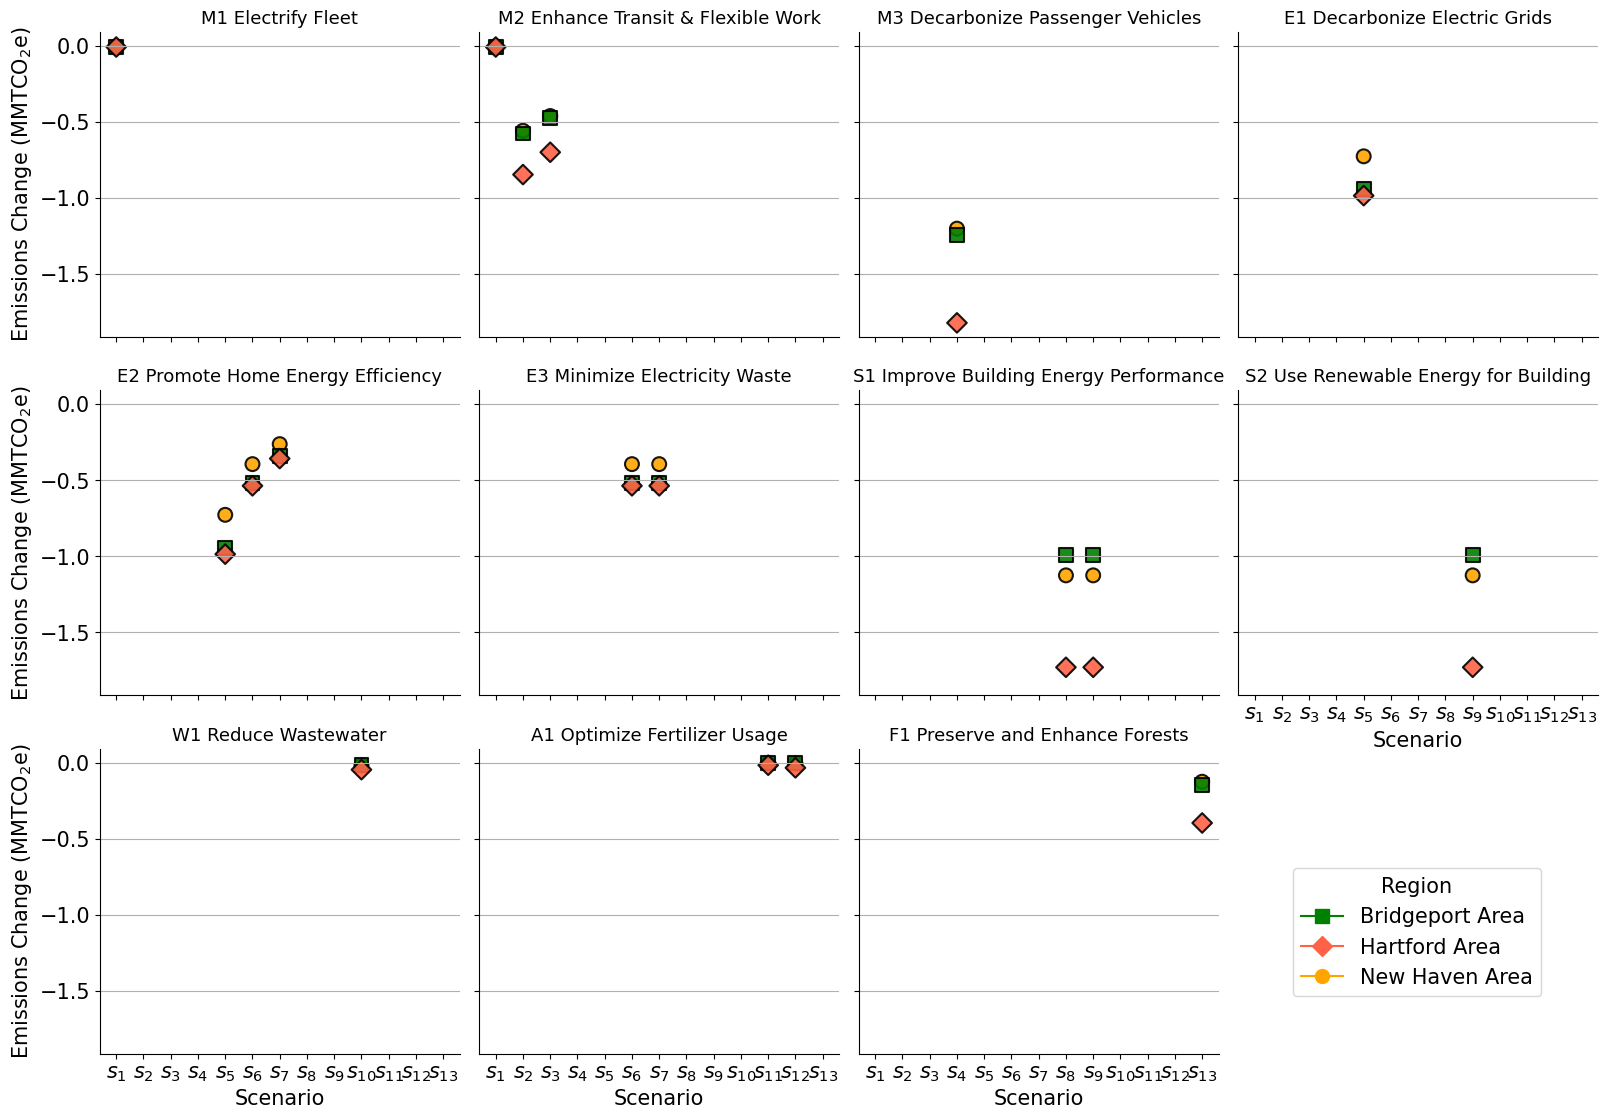

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.lines as mlines

# Create the DataFrame from the provided data
data = {
    "Strategy": ["M1", "M2", "M2", "M2", "M3", "E1", "E2", "E2", "E2", "E3", "E3", "S1", "S1", "S2", "W1", "A1", "A1", "F1"],
    "Scenario": ["S1", "S1", "S2", "S4", "S3", "S5", "S5", "S6", "S7", "S6", "S7", "S8", "S9", "S9", "S10", "S11", "S12", "S13"],
    "New Haven": [-0.006070271, -0.006070271, -0.559655534, -0.462835876, -1.203476095, -0.727759452, 
                  -0.727759452, -0.394482116, -0.262988077, -0.394482116, -0.394482116, -1.1258206, 
                  -1.1258206, -1.1258206, -0.018571429, -0.002924109, -0.005848217, -0.125578246],
    "Bridgeport": [-0.006267786, -0.006267786, -0.577865654, -0.477895669, -1.242634904, -0.945171364, 
                   -0.945171364, -0.515894166, -0.343929444, -0.515894166, -0.515894166, -0.993646979, 
                   -0.993646979, -0.993646979, -0.015800514, -0.001440705, -0.002881411, -0.147446347],
    "Hartford": [-0.009194623, -0.009194623, -0.8477087, -0.701056229, -1.822901933, -0.986564255, 
                 -0.986564255, -0.537065672, -0.358043781, -0.537065672, -0.537065672, -1.730320846, 
                 -1.730320846, -1.730320846, -0.046469401, -0.017043522, -0.034087043, -0.396749413]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Mapping for strategy labels
strategy_labels = {
    "M1": "M1 Electrify Fleet",
    "M2": "M2 Enhance Transit & Flexible Work",
    "M3": "M3 Decarbonize Passenger Vehicles",
    "E1": "E1 Decarbonize Electric Grids",
    "E2": "E2 Promote Home Energy Efficiency",
    "E3": "E3 Minimize Electricity Waste",
    "S1": "S1 Improve Building Energy Performance",
    "S2": "S2 Use Renewable Energy for Building",
    "W1": "W1 Reduce Wastewater",
    "A1": "A1 Optimize Fertilizer Usage",
    "F1": "F1 Preserve and Enhance Forests"
}

# Replace strategy codes with their corresponding labels
df['Strategy'] = df['Strategy'].map(strategy_labels)

# Create a complete DataFrame with all scenarios
all_scenarios = pd.DataFrame({"Scenario": ["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13"]})
complete_df = all_scenarios.merge(df, on="Scenario", how="outer")

# Convert data to a long format for plotting
df_long = complete_df.melt(id_vars=["Strategy", "Scenario"], 
                            value_vars=["New Haven", "Bridgeport", "Hartford"],
                            var_name="Region", value_name="Reduction")

# Check if df_long is empty
if df_long.empty:
    print("Warning: df_long is empty. No data to plot.")
else:
    # Define the order of strategies based on their prefix
    strategy_order = list(df['Strategy'].unique())

    # Define a custom color palette
    custom_palette = {
        "New Haven": "orange",  # Color for New Haven
        "Bridgeport": "green",  # Color for Bridgeport
        "Hartford": "tomato"     # Color for Hartford
    }

    # Create a FacetGrid to plot each strategy in a separate facet
    g = sns.FacetGrid(df_long, col="Strategy", col_order=strategy_order, col_wrap=4, sharex=True, sharey=True, height=4)

    # Map scatterplot to each facet with unique markers for each region
    markers = {"New Haven": "o", "Bridgeport": "s", "Hartford": "D"}
    g.map_dataframe(
        sns.scatterplot, 
        x="Scenario", y="Reduction", 
        style="Region", hue="Region", palette=custom_palette,
        markers=markers, s=100, 
        edgecolor="black", facecolors="none", alpha=0.9, linewidth=1.5
    )

    # Adjust labels and titles
    g.set_axis_labels("Scenario", "Emissions Change (MMTCO$_2$e)", fontsize=15)
    g.set_titles(col_template="{col_name}", size=13)
    g.set_xticklabels(rotation=0)

    # Set the font size for x and y axis ticks
    for ax in g.axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.yaxis.grid(True)

    # Set all scenarios on the x-axis with subscripts
    subscripted_scenarios = [f"$s_{{{i}}}$" for i in range(1, len(all_scenarios['Scenario']) + 1)]
    
    for ax in g.axes.flat:
        ax.set_xticks(range(len(all_scenarios['Scenario'])))
        ax.set_xticklabels(subscripted_scenarios, rotation=0)

    plt.subplots_adjust(top=0.9)
    
        # Create the custom legend manually in the desired order
    bridgeport_patch = mlines.Line2D([], [], color='green', marker='s', markersize=10,label='Bridgeport Area')  # Bridgeport first
    hartford_patch = mlines.Line2D([], [], color='tomato', marker='D', markersize=10,label='Hartford Area')      # Hartford second
    new_haven_patch = mlines.Line2D([], [], color='orange', marker='o', markersize=10, label='New Haven Area')   # New Haven last
    


    # Add the custom legend to the figure with the specified order
    legend = g.fig.legend(handles=[bridgeport_patch, hartford_patch, new_haven_patch], 
                          title="Region", bbox_to_anchor=(0.8, 0.15), loc="center left", 
                          borderaxespad=0, fontsize=15)


    # Set the font size for the legend title
    legend.get_title().set_fontsize(15)

    # Show the plot
    plt.savefig('../../figures/paper-images/emissions-reduction.jpg', dpi=800, bbox_inches='tight') 
    plt.show()


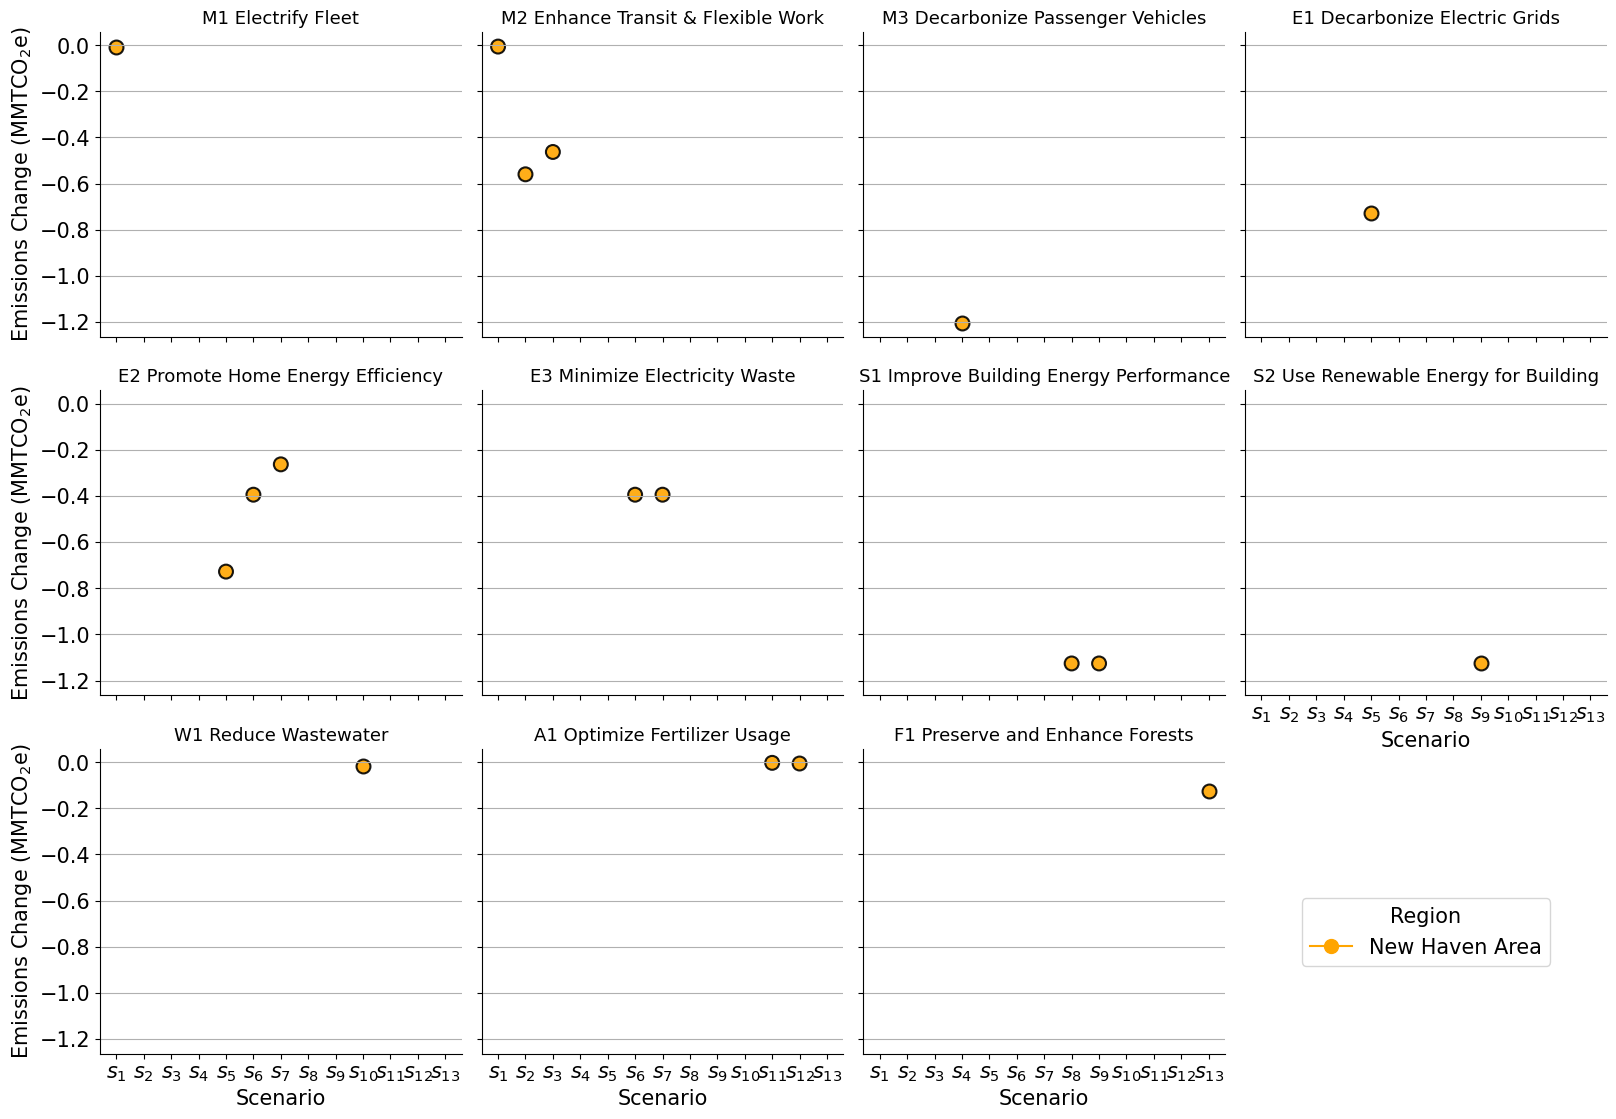

In [11]:
# Filter df_long to include only rows where Region is "New Haven"
df_long_new_haven = df_long[df_long["Region"] == "New Haven"]

# Check if df_long_new_haven is empty
if df_long_new_haven.empty:
    print("Warning: df_long_new_haven is empty. No data to plot.")
else:
    # Define the order of strategies based on their prefix
    strategy_order = list(df['Strategy'].unique())

    # Define a custom color palette for New Haven only
    custom_palette = {"New Haven": "orange"}

    # Create a FacetGrid to plot each strategy in a separate facet
    g = sns.FacetGrid(df_long_new_haven, col="Strategy", col_order=strategy_order, col_wrap=4, sharex=True, sharey=True, height=4)

    # Map scatterplot to each facet with markers for New Haven
    g.map_dataframe(
        sns.scatterplot, 
        x="Scenario", y="Reduction", 
        hue="Region", palette=custom_palette,
        marker="o", s=100, 
        edgecolor="black", facecolors="none", alpha=0.9, linewidth=1.5
    )

    # Adjust labels and titles
    g.set_axis_labels("Scenario", "Emissions Change (MMTCO$_2$e)", fontsize=15)
    g.set_titles(col_template="{col_name}", size=13)
    g.set_xticklabels(rotation=0)

    # Set the font size for x and y axis ticks
    for ax in g.axes.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.yaxis.grid(True)

    # Set all scenarios on the x-axis with subscripts
    subscripted_scenarios = [f"$s_{{{i}}}$" for i in range(1, len(all_scenarios['Scenario']) + 1)]
    
    for ax in g.axes.flat:
        ax.set_xticks(range(len(all_scenarios['Scenario'])))
        ax.set_xticklabels(subscripted_scenarios, rotation=0)

    plt.subplots_adjust(top=0.9)
    
    # Create a custom legend for New Haven only
    new_haven_patch = mlines.Line2D([], [], color='orange', marker='o', markersize=10, label='New Haven Area')

    # Add the custom legend to the figure
    legend = g.fig.legend(handles=[new_haven_patch], 
                          title="Region", bbox_to_anchor=(0.8, 0.15), loc="center left", 
                          borderaxespad=0, fontsize=15)

    # Set the font size for the legend title
    legend.get_title().set_fontsize(15)

    # Show the plot
    plt.savefig('../../figures/paper-images/emissions-reduction.jpg', dpi=800, bbox_inches='tight') 
    plt.show()
